In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax.experimental.ode import odeint

jax.config.update("jax_enable_x64", True)
from pyutils.jax import buiter

# New Keynesian Model in Continuous Time

$$\dot i^* = -\lambda_i (i^*-\rho)$$
$$\dot x = i^*-r+(\phi-1)\pi$$
$$\dot\pi = \rho\pi -\kappa x$$

Note that predetermined variabless ($i^*$) come first.

In [7]:
i_star = 0.02
r = 0.02
phi = 1.3
rho = 0.02
kappa = 0.2
lambda_i = 0.5
A = jnp.array([[-lambda_i, 0, 0],
              [1, 0, (phi-1)],
              [0, -kappa, rho]])
B = jnp.array([[lambda_i*rho],
               [-r],
               [0]])
x = jnp.array(0.0175).reshape(-1,1)
t, sol = buiter.simulate(A, B, x, T = 10)

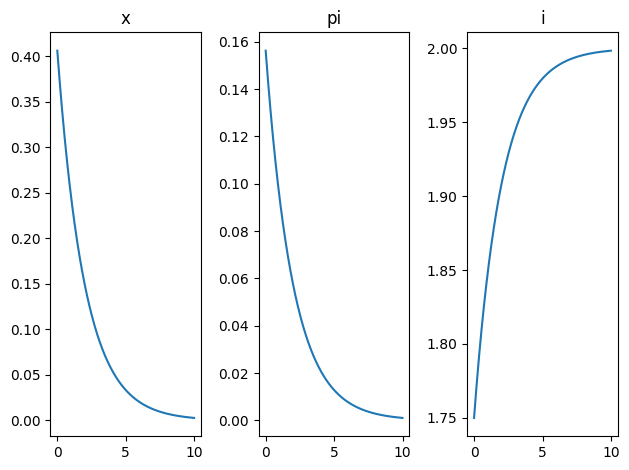

In [6]:
fig, ax = plt.subplots(ncols = 3)
ax[0].plot(t, sol[:,1]*100)
ax[0].set_title("x")
ax[1].plot(t, sol[:,2]*100)
ax[1].set_title("pi")
ax[2].plot(t, sol[:,0]*100)
ax[2].set_title("i")
plt.tight_layout()
plt.show()